## Termiology

* Vocabulary: the set of "all" words, reasonable subset of words
* Corpus: "A large collection of writings of a specifc kind or on a specific subject." Simply refer to ML dataset sometimes.
* N-gram: Simply refers to N consecutive items (eg. words, subwords, characters). Two items called bigrams
* Vector: A quantity that has both magnitude and direction; An array of scalars
* Bag of words: Vector models and classic machine learning models use bag of words while probabilistic models and deep learning do not. 
* Stop words: Words we wish to ignore. 

## Stop Words

In [1]:
# Download stop words using nltk
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

# english can be replaced with other language choice
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Stemming and Lemmatization

Convert words to their root word (like walking, walked to walk) to reduce the voculary size and the dimension of the data.

* Stemming is very crude - it just chops off the end of the word and the result is not neccessarily a real word.

* Lemmatization is more sophisticated, uses actual rules of language and the true root word will be returned.

### Stemming

* Based on simple heuristics
* Eg: Ends with SSES -> Remove ES; Replacement -> Replac (not a real word)
* Multiple stemming algorithms (e.g. Porter Stemmer in NLTK)

In [2]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()
porter.stem("walking") # returns 'walk'

'walk'

### Lemmatization

* Think of it as a lookup table/table of rules
* Stemming: "Better" -> "Better"
* Lemmatization: "Better" -> "Good"
* Eg: Was/Is -> Be

Appears in NLTK, spaCy and others

In [3]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download("wordnet")

lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize("mice") # return 'mouse'

lemmatizer.lemmatize("going") # return 'going'
lemmatizer.lemmatize("going", pos=wordnet.VERB) # returns 'go'

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


'go'

#### NLTK Quirk Regarding POS tages

* In order to properly use the lemmatizer, we should first do POS tagging.
* NLTK can do POS tagging. 
* POS tags are not compatible with the WordNet Lemmatizer (solve by map tags from one format to another)

### Stemming and Lemmatization applications

#### Search Engines

* Query can not only return the exact matches but also relavent results y converting words to root form
* Can do rough typing

#### Online Ads

* Ads are based on **Keywords**
* Advertisers want to match their ads to user search terms

### Stemming and Lemmatization Demo

In [4]:
import nltk
from nltk.stem import PorterStemmer
porter = PorterStemmer()
print(porter.stem("walked"))
print(porter.stem("walking"))
sentence = "Lemmatization is more sophisticated than stemming".split()

for token in sentence:
  print(porter.stem(token), end=" ")

walk
walk
lemmat is more sophist than stem 

In [5]:
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

from nltk.corpus import wordnet
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("walking"))
print(lemmatizer.lemmatize("walking", pos=wordnet.VERB))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
walking
walk


In [6]:
nltk.download("averaged_perceptron_tagger")
sentence = "DT has a devoted following".split()
words_and_tags = nltk.pos_tag(sentence)
words_and_tags

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('DT', 'NNP'),
 ('has', 'VBZ'),
 ('a', 'DT'),
 ('devoted', 'VBN'),
 ('following', 'NN')]

In [7]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

for word, tag in words_and_tags:
  lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag))
  print(lemma, end=" ")

DT have a devote following 

## Count Vectorizer

In [8]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

In [9]:
nltk.download("wordnet")
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [10]:
# get the data
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2022-05-09 17:24:55--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M  4.94MB/s    in 1.0s    

2022-05-09 17:24:56 (4.94 MB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [11]:
df = pd.read_csv('bbc_text_cls.csv')

In [12]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [13]:
inputs = df['text']
labels = df['labels']

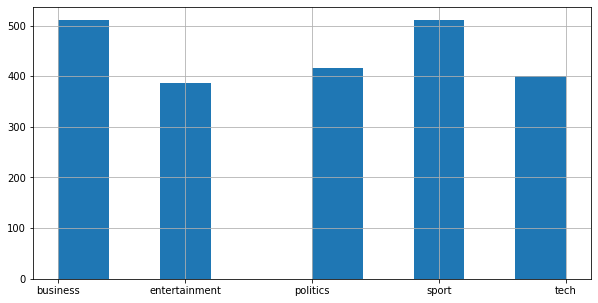

In [14]:
# Check the labels (imbalanced class)
labels.hist(figsize=(10,5));

In [15]:
# train-test split
inputs_train, inputs_test, Ytrain, Ytest = train_test_split(inputs, labels, random_state=123)

In [16]:
vectorizer = CountVectorizer()

In [17]:
# Fit and transform using the count vector (convert text to numbers)
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test) # no need to fit the test data

In [18]:
# Train the model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9922062350119905
0.9712746858168761


In [19]:
# with stopwords
vectorizer = CountVectorizer(stop_words='english')
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test) # no need to fit the test data
# Train the model
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9928057553956835
0.9766606822262118


In [20]:
def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [21]:
class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  
  def __call__(self, doc):
    tokens = word_tokenize(doc) # aka string split
    words_and_tags = nltk.pos_tag(tokens)
    return [self.wnl.lemmatize(word, pos=get_wordnet_pos(tag)) \
            for word, tag in words_and_tags]

In [22]:
# with lemmatization
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(tokenizer=LemmaTokenizer()) 
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9922062350119905
0.9676840215439856


In [23]:
class StemTokenizer:
  def __init__(self):
    self.porter = PorterStemmer()
  
  def __call__(self, doc):
    tokens = word_tokenize(doc)
    return [self.porter.stem(t) for t in tokens]

In [24]:
# with Stemming
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(tokenizer=StemTokenizer()) 
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9892086330935251
0.9694793536804309


In [25]:
def simple_tokenizer(s):
  return s.split()

In [26]:
# Simple tokenize
# string split tokenizer
vectorizer = CountVectorizer(tokenizer=simple_tokenizer) 
Xtrain = vectorizer.fit_transform(inputs_train)
Xtest = vectorizer.transform(inputs_test)
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print(model.score(Xtrain, Ytrain))
print(model.score(Xtest, Ytest))

0.9952038369304557
0.9712746858168761


## Vector Similarity

* Can be used in word/article replacement
* Measured by Euclidean Distance 
* Cosine Similarity -> cos("angle")
* Cosine Distance = 1 - Cosine Similarity

## TF-IDF - Term Frequency - Inverse Document Frequency

* Stopwords are unlikely to be useful for NLP tasks.
* Stopwords may be application-specific.

TF - IDF ~= Term Frequency (Count) /Document Frequency (Words appear in how many documents)

ifidf(t,d) = tf(t,d)* idf(t)
* t: which term t we are counting.
* d: which document d we are looking at.
* tf(t,d) = # of times t appears in d.
* idf(t) = log(N/N(t)) 
  * N(t) is the number of documents term t appears in.
  * N is the total number of documents



### Main Idea Behind TF-IDF

* Words that we want to ignore appear in many different documents.
* They won't help us differentiate between documents.
* We want to somehow scale down these word counts.


In [27]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
Xtrain = tfidf.fit_transform(#train_texts)
Xtest = tfidf.transform(#test_texts)

NameError: ignored

#### Term Frequency Variations

* Binary (1 if word appears, 0 otherwise).
* Normalize the count (sometimes, this is the default)
  tf(t,d) = count(t,d)/sum(count(t',d)) for t' belongs to terms(d)
* Take the log
  tf(t,d) = log(1+count(t,d))


#### Inverse Document Frequency Variations

* Smooth IDF
  idf(t) = log(N/(N(t)+1) + 1
* IDF Max
  idf(t) = log(max(N(t'))/N(t))
* Probabilistic IDF
  idf(t) = log((N - N(t))/N(t))

## Word-to-Index Mapping

* When converting documents to vectors, the result is a document-term matrix.
* Row = document, column = term (size = # documents * # terms)

In [ ]:
# sudo codes
current_idx = 0
word2idx = {}

for doc in documents:
  tokens = word_tokenize(doc)
  for token in tokens:
    if token not in word2idx:
      word2idx[token] = current_idx
      current_idx += 1
  

### Train test split

* Method 1: ignore words from the training set
* Method 2: create a special index for unknown/rare words. 
  * Assign any rare words (those frquency falls below a threshold) to the unknown index. 

### Reverse Mapping (Index to word)

## Neural Word Embeddings

* Can convert a document into a vector (But not sparse like counting/TFIDF)
* Embeddings are dense and low-dimensional


### Word2vec (Google)

* Embeddings are stored in the weights of the neural network.
* Goal of training: given an input word, predict whether an output word appears in its context which the given word shows. 

### Glove (Stanford)

* Not use neural networks, but invented in the era of "Deep NLP"
* Embeddings are still used in neural network at later stages

## Summary


* Connections between text (strings) and numbers

* Text preprocessing:
  * Tokenization
  * Bag of words
  * Stopwords
  * Stemming and lemmatization

* Convert text into vectors
  * Counting
  * TF-IDF
  * Vector similarity/recommender system
  * Word-to-index mapping
  * Neural word embeddings (word2ve, Glove)
  * Word analogies

## Steps of a Typical NLP Analysis
* Get the text (strings)
* Tokenize the text
* Stopwords, stemming/lemmatization
* Map tokens to integers
  * Tabular ML works with numbers
  * A table of the format (documents * tokens)
  * Need to know which column goes with which token
* Convert text into count vectors/TF-IDF
* ML task 